In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#importing data sets
train23 = pd.read_csv('train_feature_23variables.csv')
train10 = pd.read_csv('train_feature_10variables.csv')

test23 = pd.read_csv('test_feature_23variables.csv')
test10 = pd.read_csv('test_feature_10variables.csv')

In [ ]:
test23.groupby('isFraud').count()

,Unnamed: 0,cashout_lag,oldbalanceOrg,amount,newbalanceDest,transfer_lag,oldbalanceDest,newbalanceOrig,fraud_count,TRANSFER,...,cashin_lag,debit_lag,fraudcount_lag6,fraudcount_lag1,fraudcount_lag7,fraudcount_lag9,fraudcount_lag8,fraudcount_lag2,fraudcount_lag5,fraudcount_lag3
isFraud,,,,,,,,,,,,,,,,,,,,,
0,65196,65196,65196,65196,65196,65196,65196,65196,65196,65196,...,65196,65196,65196,65196,65196,65196,65196,65196,65196,65196
1,748,748,748,748,748,748,748,748,748,748,...,748,748,748,748,748,748,748,748,748,748


Training set and Test set creation

In [ ]:
X_train23 = train23.drop(['Unnamed: 0','isFraud'],axis = 1) 

In [ ]:
y_train23 = train23['isFraud']

In [ ]:
X_train10 = train10.drop(['Unnamed: 0','isFraud'],axis = 1) 
y_train10 = train10['isFraud']

Test set

In [ ]:
X_test23 = test23.drop(['Unnamed: 0','isFraud'],axis = 1) 
y_test23 = test23['isFraud']

In [ ]:
X_test10 = test10.drop(['Unnamed: 0','isFraud'],axis = 1) 
y_test10 = test10['isFraud']

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
#importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [ ]:
#Fitting Random Forest model without parameter tuning

In [ ]:
forest = RandomForestClassifier(random_state = 1)
#train the model(23 variables)
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train23, y_train23)
y_predF = modelF.predict(X_test23)

In [ ]:
#confusion matrix
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[59216  5980]
 [   46   702]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     65196
           1       0.11      0.94      0.19       748

    accuracy                           0.91     65944
   macro avg       0.55      0.92      0.57     65944
weighted avg       0.99      0.91      0.94     65944



In [ ]:
forest = RandomForestClassifier(random_state = 1)
#train the model(23 variables)
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train10, y_train10)
y_predF = modelF.predict(X_test10)

In [ ]:
#confusion matrix
print(confusion_matrix(y_test10,y_predF))
print(classification_report(y_test10,y_predF))

[[57662  7534]
 [   42   706]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     65196
           1       0.09      0.94      0.16       748

    accuracy                           0.89     65944
   macro avg       0.54      0.91      0.55     65944
weighted avg       0.99      0.89      0.93     65944



In [ ]:
# Random forest with parameter tuning (23 variable case)
n_estimators = [100, 300]
max_depth = [5, 8]
min_samples_split = [2, 5, 100]
min_samples_leaf = [ 2, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train23, y_train23)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
y_predF = bestF.predict(X_test23)
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[65148    48]
 [  281   467]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65196
           1       0.91      0.62      0.74       748

    accuracy                           1.00     65944
   macro avg       0.95      0.81      0.87     65944
weighted avg       0.99      1.00      0.99     65944



In [ ]:
bestF.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(random_state=1),
 'n_jobs': -1,
 'param_grid': {'n_estimators': [100, 300],
  'max_depth': [5, 8],
  'min_samples_split': [2, 5, 100],
  'min_samples_leaf': [2, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

In [ ]:
# Random forest with parameter tuning (23 variable case)
n_estimators = [75,100]
max_depth = [5, 8]
min_samples_split = [1,2]
min_samples_leaf = [ 1,2] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train23, y_train23)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\ACER\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ACER\anaconda3\lib\site-packages\joblib\

In [ ]:
y_predF = bestF.predict(X_test23)
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[65148    48]
 [  280   468]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65196
           1       0.91      0.63      0.74       748

    accuracy                           1.00     65944
   macro avg       0.95      0.81      0.87     65944
weighted avg       0.99      1.00      0.99     65944



In [ ]:
# Random forest with parameter tuning (10 variable case)
n_estimators = [100, 300]
max_depth = [5, 8]
min_samples_split = [2, 5, 100]
min_samples_leaf = [ 2, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF2 = gridF.fit(X_train10, y_train10)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
y_predF = bestF2.predict(X_test10)
print(confusion_matrix(y_test10,y_predF))
print(classification_report(y_test10,y_predF))

[[60218  4978]
 [   76   672]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     65196
           1       0.12      0.90      0.21       748

    accuracy                           0.92     65944
   macro avg       0.56      0.91      0.58     65944
weighted avg       0.99      0.92      0.95     65944



In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
rf_probs = bestF.predict_proba(X_test23)
rf_probs = rf_probs[:,1]

In [ ]:
rf_probs 

array([0.78850285, 0.78333167, 0.6360491 , ..., 0.79747074, 0.73006516,
       0.68954493])

In [ ]:
r_probs = [0 for _ in range(len(y_test23))]

In [ ]:
r_auc = roc_auc_score(y_test23,r_probs)
rf_auc = roc_auc_score(y_test23,y_predF)

In [ ]:
print(r_auc)
print(rf_auc)

0.5
0.9110206721779788


In [ ]:
r_fpr,r_tpr,_ = roc_curve(y_test23,r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test23,y_predF)

In [ ]:
import matplotlib.pyplot as plt

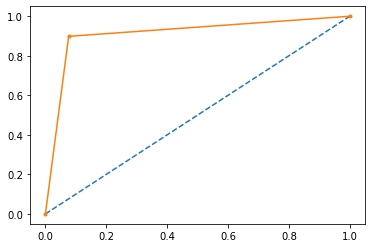

In [ ]:
plt.plot(r_fpr,r_tpr,linestyle='--')
plt.plot(rf_fpr,rf_tpr,marker='.')

In [ ]:
threshold = 0.1

predicted_proba = bestF.predict_proba(X_test23)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test23, predicted))
print(classification_report(y_test23, predicted))

[[52130 13066]
 [   58   690]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     65196
           1       0.05      0.92      0.10       748

    accuracy                           0.80     65944
   macro avg       0.52      0.86      0.49     65944
weighted avg       0.99      0.80      0.88     65944



### Undersampling

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 
under_sampler = RandomUnderSampler(0.8)
X_train_us, y_train_us = under_sampler.fit_resample(X_train23, y_train23)
print(" The number of class before thw fit {}".format(Counter((y_train23))))
print(" The number of class after thw fit {}".format(Counter((y_train_us))))

 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 2735, 1: 2188})


C:\Users\ACER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [ ]:
# Random forest with parameter tuning (23 variable case)
n_estimators = [100, 300]
max_depth = [5, 8]
min_samples_split = [2, 5, 100]
min_samples_leaf = [ 2, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_us, y_train_us)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
y_predF = bestF.predict(X_test23)
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[61614  3582]
 [    5   743]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     65196
           1       0.17      0.99      0.29       748

    accuracy                           0.95     65944
   macro avg       0.59      0.97      0.63     65944
weighted avg       0.99      0.95      0.96     65944



In [ ]:
rf_probs = bestF.predict_proba(X_test23)
rf_probs = rf_probs[:,1]

r_auc = roc_auc_score(y_test23,r_probs)
rf_auc = roc_auc_score(y_test23,y_predF)

print(r_auc)
print(rf_auc)


0.5
0.9691867435192539


In [ ]:
r_fpr,r_tpr,_ = roc_curve(y_test23,r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test23,y_predF)

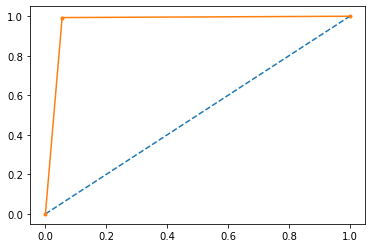

In [ ]:
plt.plot(r_fpr,r_tpr,linestyle='--')
plt.plot(rf_fpr,rf_tpr,marker='.')

In [ ]:
threshold = 0.15

predicted_proba = bestF.predict_proba(X_test23)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test23, predicted))
print(classification_report(y_test23, predicted))

[[19581 45615]
 [    0   748]]
              precision    recall  f1-score   support

           0       1.00      0.30      0.46     65196
           1       0.02      1.00      0.03       748

    accuracy                           0.31     65944
   macro avg       0.51      0.65      0.25     65944
weighted avg       0.99      0.31      0.46     65944



### Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(0.5)
X_train_os,y_train_os = over_sampler.fit_resample(X_train23, y_train23)
print(" The number of class before thw fit {}".format(Counter((y_train23))))
print(" The number of class after thw fit {}".format(Counter((y_train_os))))

C:\Users\ACER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 270536, 1: 135268})


In [ ]:
# Random forest with parameter tuning (23 variable case)
n_estimators = [100, 300]
max_depth = [5, 8]
min_samples_split = [2, 5, 100]
min_samples_leaf = [ 2, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
y_predF = bestF.predict(X_test23)
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[64207   989]
 [   37   711]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     65196
           1       0.42      0.95      0.58       748

    accuracy                           0.98     65944
   macro avg       0.71      0.97      0.79     65944
weighted avg       0.99      0.98      0.99     65944



In [ ]:
rf_probs = bestF.predict_proba(X_test23)
rf_probs = rf_probs[:,1]

r_auc = roc_auc_score(y_test23,r_probs)
rf_auc = roc_auc_score(y_test23,y_predF)

print(r_auc)
print(rf_auc)

0.5
0.9676825585244724


In [ ]:
r_fpr,r_tpr,_ = roc_curve(y_test23,r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test23,y_predF)

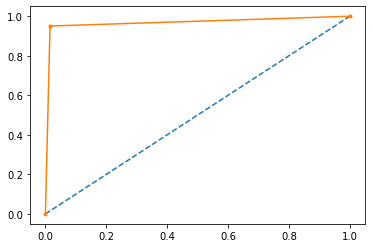

In [ ]:
plt.plot(r_fpr,r_tpr,linestyle='--')
plt.plot(rf_fpr,rf_tpr,marker='.')

In [ ]:
threshold = 0.2

predicted_proba = bestF.predict_proba(X_test23)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test23,predicted))
print(classification_report(y_test23, predicted))

[[44436 20760]
 [    1   747]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     65196
           1       0.03      1.00      0.07       748

    accuracy                           0.69     65944
   macro avg       0.52      0.84      0.44     65944
weighted avg       0.99      0.69      0.80     65944



### Synthetic Sampling

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
os = SMOTETomek(0.5)
X_train_ns,y_train_ns = os.fit_resample(X_train23,y_train23)
print(" The number of class before thw fit {}".format(Counter((y_train23))))
print(" The number of class after thw fit {}".format(Counter((y_train_ns))))

C:\Users\ACER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 270482, 1: 135214})


In [ ]:
# Random forest with parameter tuning (23 variable case)
n_estimators = [100, 300]
max_depth = [5, 8]
min_samples_split = [2, 5, 100]
min_samples_leaf = [ 2, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_ns, y_train_ns)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
y_predF = bestF.predict(X_test23)
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[64076  1120]
 [   46   702]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     65196
           1       0.39      0.94      0.55       748

    accuracy                           0.98     65944
   macro avg       0.69      0.96      0.77     65944
weighted avg       0.99      0.98      0.99     65944



In [ ]:
rf_probs = bestF.predict_proba(X_test23)
rf_probs = rf_probs[:,1]

r_auc = roc_auc_score(y_test23,r_probs)
rf_auc = roc_auc_score(y_test23,y_predF)

print(r_auc)
print(rf_auc)

0.5
0.9606618528809714


In [ ]:
r_fpr,r_tpr,_ = roc_curve(y_test23,r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test23,y_predF)

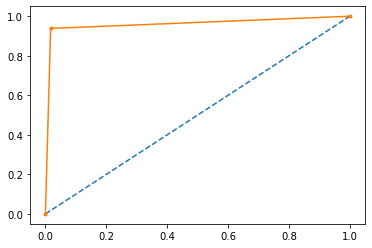

In [ ]:
plt.plot(r_fpr,r_tpr,linestyle='--')
plt.plot(rf_fpr,rf_tpr,marker='.')

In [ ]:
threshold = 0.4

predicted_proba = bestF.predict_proba(X_test23)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test23,predicted))
print(classification_report(y_test23, predicted))

[[61712  3484]
 [   24   724]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     65196
           1       0.17      0.97      0.29       748

    accuracy                           0.95     65944
   macro avg       0.59      0.96      0.63     65944
weighted avg       0.99      0.95      0.96     65944

